In [72]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.models import load_model
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers.convolutional import Convolution2D, Cropping2D, Conv2D
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU,GlobalAveragePooling2D
import time, cv2, glob

In [46]:
def kerasModel4():
        model = Sequential()
        model.add(Conv2D(16, (8, 8), strides=(4, 4), padding='valid', input_shape=(size,size,1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (5, 5), padding="same"))
        model.add(Activation('relu'))
        model.add(GlobalAveragePooling2D())
        model.add(Dropout(.2))
        # model.add(Activation('relu'))
        # model.add(Dense(1024))
        # model.add(Dropout(.5))
        model.add(Dense(512))
        model.add(Dropout(.1))
        model.add(Activation('relu'))
        # model.add(Dense(256))
        # model.add(Dropout(.5))
        # model.add(Activation('relu'))
        model.add(Dense(2))
        model.add(Activation('softmax'))
        return model


In [47]:
size=300

 ## load Training data : pothole
potholeTrainImages = glob.glob("Dataset/train/pothole/*.jpg")
potholeTrainImages.extend(glob.glob("Dataset/train/pothole/*.jpeg"))
potholeTrainImages.extend(glob.glob("Dataset/train/pothole/*.png"))

In [48]:
train1 = [cv2.imread(img,0) for img in potholeTrainImages]
for i in range(0,len(train1)):
    train1[i] = cv2.resize(train1[i],(size,size))
temp1 = np.asarray(train1)


In [49]:
nonPotholeTrainImages = glob.glob("Dataset/train/plain/*.jpg")
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.jpeg"))
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.png"))
train2 = [cv2.imread(img,0) for img in nonPotholeTrainImages]
for i in range(0,len(train2)):
    train2[i] = cv2.resize(train2[i],(size,size))
temp2 = np.asarray(train2)

In [50]:
nonPotholeTestImages = glob.glob("Dataset/test/plain/*.jpg")
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.jpeg"))
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.png"))
test2 = [cv2.imread(img,0) for img in nonPotholeTestImages]
for i in range(0,len(test2)):
    test2[i] = cv2.resize(test2[i],(size,size))
temp4 = np.asarray(test2)


In [51]:
potholeTestImages = glob.glob("Dataset/test/pothole/*.jpg")
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.jpeg"))
# nonPotholeTrainImages.extend(glob.glob("C:/Users/anant/Desktop/pothole-and-plain-rode-images/My Dataset/train/Plain/*.png"))
test1 = [cv2.imread(img,0) for img in potholeTestImages]
for i in range(0,len(test1)):
    test1[i] = cv2.resize(test1[i],(size,size))
temp3 = np.asarray(test1)


In [52]:
X_train = []
X_train.extend(temp1)
X_train.extend(temp2)
X_train = np.asarray(X_train)

X_test = []
X_test.extend(temp3)
X_test.extend(temp4)
X_test = np.asarray(X_test)

In [53]:
y_train1 = np.ones([temp1.shape[0]],dtype = int)
y_train2 = np.zeros([temp2.shape[0]],dtype = int)
y_test1 = np.ones([temp3.shape[0]],dtype = int)
y_test2 = np.zeros([temp4.shape[0]],dtype = int)


In [54]:
print(y_train1[0])
print(y_train2[0])
print(y_test1[0])
print(y_test2[0])


1
0
1
0


In [55]:
y_train = []
y_train.extend(y_train1)
y_train.extend(y_train2)
y_train = np.asarray(y_train)

y_test = []
y_test.extend(y_test1)
y_test.extend(y_test2)
#y_testt=y_test.copy()
y_test = np.asarray(y_test)

In [56]:
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)

X_train = X_train.reshape(X_train.shape[0], size, size, 1)
X_test = X_test.reshape(X_test.shape[0], size, size, 1)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [57]:
print("train shape X", X_train.shape)
print("train shape y", y_train.shape)

inputShape = (size, size, 1)
model = kerasModel4()

X_train = X_train/255
X_test = X_test/255

#model.compile('adam', 'categorical_crossentropy', ['accuracy'])
#history = model.fit(X_train, y_train, epochs=200,validation_split=0.1)

print("")

train shape X (634, 300, 300, 1)
train shape y (634, 2)



In [14]:
print("Saving model weights and configuration file")
model.save('latest_full_model.h5')
print("Saved model to disk")

Saving model weights and configuration file
Saved model to disk


In [58]:
model = Sequential()
model = load_model('latest_full_model.h5')


In [59]:
metricsTrain =model.evaluate(X_train, y_train)
print("Training Accuracy: ",metricsTrain[1]*100,"%")

print("")

20/20 [==============================] - 5s 236ms/step - loss: 0.3471 - accuracy: 0.8454
Training Accuracy:  84.54258441925049 %



In [60]:
metricsTest = model.evaluate(X_test,y_test)
print("Testing Accuracy: ",metricsTest[1]*100,"%")

3/3 [==============================] - 0s 107ms/step - loss: 0.4052 - accuracy: 0.8333
Testing Accuracy:  83.33333134651184 %


In [61]:
y_predicted = model.predict(X_test)
y_predicted[0]

3/3 [==============================] - 0s 97ms/step


array([0.71793026, 0.28206965], dtype=float32)

In [66]:
labels=["plain","pothole"]
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_testt=[(i[0]+1)%2 for i in y_test]
print(y_predicted_labels[:10])
print(y_testt[:10])

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]


In [69]:
cm = tf.math.confusion_matrix(labels=y_testt,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30,  9],
       [ 4, 35]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

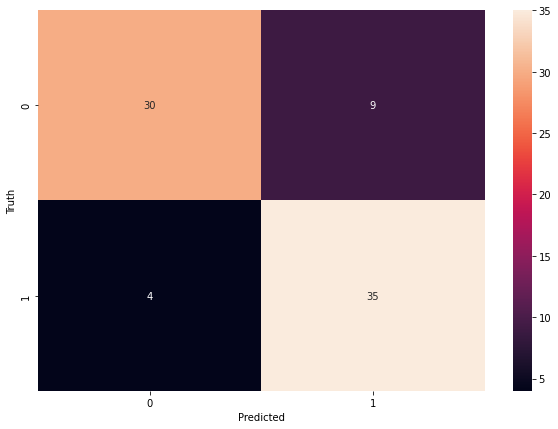

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
print(classification_report(y_testt, y_predicted_labels))

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82        39
         1.0       0.80      0.90      0.84        39

    accuracy                           0.83        78
   macro avg       0.84      0.83      0.83        78
weighted avg       0.84      0.83      0.83        78

